In [ ]:
!pip install -U --pre tensorflow=="2.2.0"

     |████████████████████████████████| 516.2MB 30kB/s 
     |████████████████████████████████| 3.0MB 47.5MB/s 
     |████████████████████████████████| 460kB 48.7MB/s 
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [ ]:
import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 2303, done.
remote: Counting objects: 100% (2303/2303), done.
remote: Compressing objects: 100% (1997/1997), done.
remote: Total 2303 (delta 564), reused 932 (delta 283), pack-reused 0
Receiving objects: 100% (2303/2303), 30.58 MiB | 24.44 MiB/s, done.
Resolving deltas: 100% (564/564), done.


In [ ]:
# Install the Object Detection API
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp36-none-any.whl size=1598976 sha256=f489b717990444e438b2b653f75701965f6a821192d3969c38d3ecf98c1cf1f6
  Stored in directory: /tmp/pip-ephem-wheel-cache-e4kxl8la/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
  Created wheel for avro-python3: filename=avro_python3-1.10.0-cp36-none-any.whl size=43735 sha256=37cbcdbe192338823ae8b55d43c2853d45a13007719b8e8cb0013af581ac5080
  Stored in directory: /root/.cache/pip/wheels/3f/15/cd/fe4ec8b88c130393464703ee8111e2cddebdc40e1b59ea85e9
  Created wheel for dill: filename=dill-0.3.1.1-cp36-none-any.whl size=78532 sha256=b8bea652d388465abb2b702aa491f4aa193b8bf3074537685c6ecfb0b10e8439
  Stored in directory: /root/.cache/pip/wheels/59/b1/91/f02e76c732915c4015ab4010f3015469866c1eb9b14058d8e7
  Created wheel for hdfs: filename=hdfs-2.5.8-cp36-none-any.whl size=33213 sha256=67b9ce249e18e9618cfb95e18ea7d5267adb6c370b53d73d16a5dd566d

ERROR: multiprocess 0.70.10 has requirement dill>=0.3.2, but you'll have dill 0.3.1.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: apache-beam 2.25.0 has requirement avro-python3!=1.9.2,<1.10.0,>=1.8.1; python_version >= "3.0", but you'll have avro-python3 1.10.0 which is incompatible.


In [ ]:
#run model builder test
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py

2020-11-18 08:24:05.836565: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Running tests under Python 3.6.9: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model
2020-11-18 08:24:07.987371: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-11-18 08:24:08.022541: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-11-18 08:24:08.023118: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-11-18 08:24:08.023161: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully o

In [ ]:
%cd  /content/models/research/object_detection/

/content/models/research/object_detection


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive2


In [ ]:
!python xml_to_csv.py

Successfully converted xml to csv.


In [ ]:
!python generate_tfrecord.py --csv_input=images/train_labels.csv --image_dir=/content/models/research/object_detection/images/train --output_path=train.record

2020-11-18 08:25:59.951722: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Successfully created the TFRecords: /content/models/research/object_detection/train.record


In [ ]:
!python generate_tfrecord.py --csv_input=images/test_labels.csv --image_dir=/content/models/research/object_detection/images/test --output_path=test.record

2020-11-18 08:26:06.178813: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Successfully created the TFRecords: /content/models/research/object_detection/test.record


In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz
!tar -xf efficientdet_d0_coco17_tpu-32.tar.gz

--2020-11-18 08:26:11--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.195.128, 2607:f8b0:400e:c03::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.195.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30736482 (29M) [application/x-tar]
Saving to: ‘efficientdet_d0_coco17_tpu-32.tar.gz’

efficientdet_d0_coc 100%[===================>]  29.31M  --.-KB/s    in 0.1s    

2020-11-18 08:26:11 (233 MB/s) - ‘efficientdet_d0_coco17_tpu-32.tar.gz’ saved [30736482/30736482]



!python model_main_tf2.py \
    --pipeline_config_path=training/ssd_efficientdet_d0_512x512_coco17_tpu-8.config \
    --model_dir=training \
    --alsologtostderr

In [ ]:
!python model_main_tf2.py --pipeline_config_path=training/ssd_efficientdet_d0_512x512_coco17_tpu-8.config --model_dir=training --alsologtostderr

2020-11-18 08:31:53.070066: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-11-18 08:31:55.173375: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-11-18 08:31:55.217943: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-11-18 08:31:55.218587: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-11-18 08:31:55.218621: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-11-18 08:31:55.220304: I tensorflow/stream_executor/platform/default

In [ ]:
!python exporter_main_v2.py \
    --trained_checkpoint_dir=training \
    --pipeline_config_path=training/ssd_efficientdet_d0_512x512_coco17_tpu-8.config \
    --output_directory inference_graph

2020-11-18 10:34:26.237071: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-11-18 10:34:28.450353: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-11-18 10:34:28.487520: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-11-18 10:34:28.488099: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-11-18 10:34:28.488140: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-11-18 10:34:28.497190: I tensorflow/stream_executor/platform/default

In [ ]:
from google.colab import files
files.download(f'/content/models/research/object_detection/inference_graph/saved_model/saved_model.pb') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import io
import os
import scipy.misc
import numpy as np
import six
import time
import glob
from IPython.display import display

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
import ops as utils_ops
import label_map_util
import visualization_utils as vis_util

%matplotlib inline

In [ ]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path (this can be local or on colossus)

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [ ]:
labelmap_path = '/content/models/research/object_detection/training/labelmap.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(labelmap_path, use_display_name=True)
print(category_index)

{1: {'id': 1, 'name': 'first_part'}, 2: {'id': 2, 'name': 'second_part'}}


In [ ]:
tf.keras.backend.clear_session()

model = tf.saved_model.load(f'/content/models/research/object_detection/inference_graph/saved_model')

In [ ]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

y
a
b


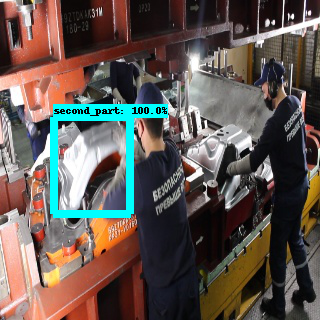

y
a
b


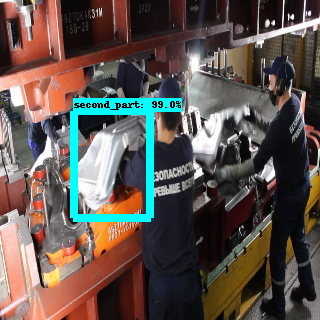

y
a
b


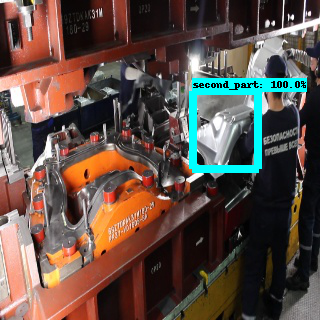

y
a
b


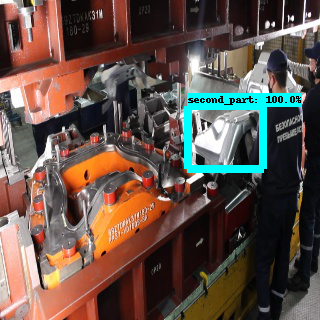

y
a
b


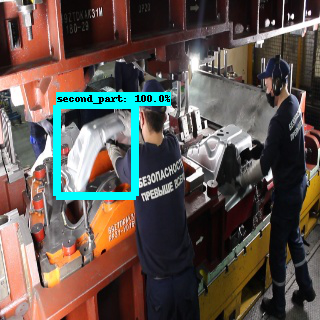

y
a
b


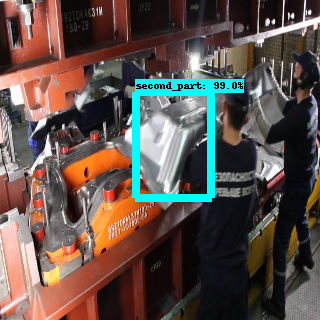

y
a
b


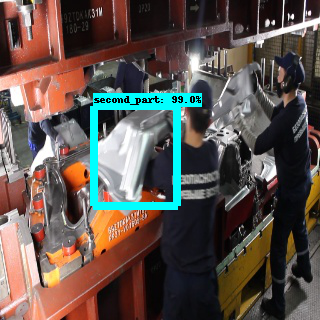

y
a
b


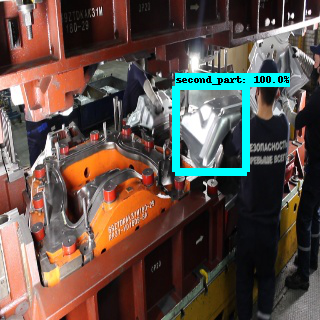

y
a
b


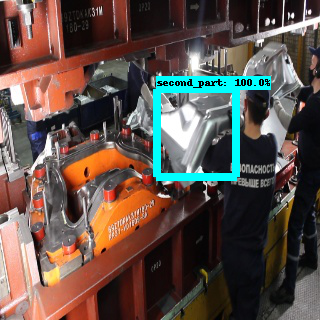

In [ ]:
for image_path in glob.glob('/content/models/research/object_detection/images/test/*.jpg'):
  image_np = load_image_into_numpy_array(image_path)
  output_dict = run_inference_for_single_image(model, image_np)
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)
  display(Image.fromarray(image_np))